<a href="https://colab.research.google.com/github/hafeez42/marketing_data_science/blob/master/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Dataset
For this analysis I will use very popular Online Retail II dataset from UCI Machine Learning Repository.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
import requests
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
r = requests.get(data_url)

with open("online_retail.xlsx",'wb') as f:
     f.write(r.content)

In [ ]:
df = pd.read_excel('online_retail.xlsx')

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# 2. EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


# 2. Data Preparation
## 2.1 Missing Values

I will simply drop missing values. However, it will reduce the size of dataset by 24.9%.

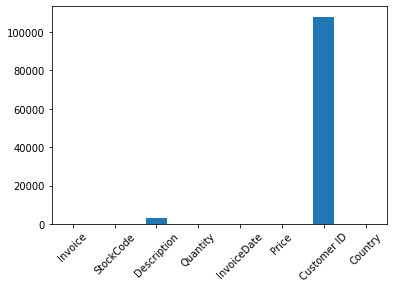

In [ ]:
df.isnull().sum().plot.bar(x='index', y='n', rot=45)

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB



## 2.2 Positive Quantity
To eliminate returned items transactions, I'll keep only positive values of `Quantity` column

In [ ]:
df = df[df['Quantity']>=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


## 2.3 UK Only Basket
Tha majority of transactions (> 90%) come from United Kingdom. I will create basket which contains the quantity of each item per transaction.

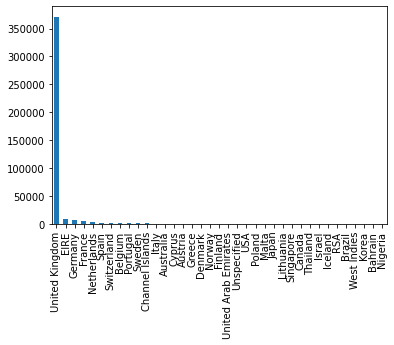

In [ ]:
df['Country'].value_counts().plot(kind='bar')

In [ ]:
df.groupby('Description')['Quantity'].sum()

Description
  DOORMAT UNION JACK GUNS AND ROSES      169
 3 STRIPEY MICE FELTCRAFT                663
 4 PURPLE FLOCK DINNER CANDLES           200
 ANIMAL STICKERS                         385
 BLACK PIRATE TREASURE CHEST              47
                                       ...  
ZINC HEART LATTICE TRAY OVAL             325
ZINC METAL HEART DECORATION            13958
ZINC POLICE BOX LANTERN                  193
ZINC TOP  2 DOOR WOODEN SHELF            234
ZINC WILLIE WINKIE  CANDLE STICK        3630
Name: Quantity, Length: 4444, dtype: int64

In [ ]:
basket = df[df['Country']=='United Kingdom'].groupby(['Invoice','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')
basket.head()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,FLAMINGO LIGHTS,HOME SWEET HOME BLACKBOARD,IVORY PAPER CUP CAKE CASES,LARGE SKULL WINDMILL,NEW BAROQUE BLACK BOXES,OVAL WALL MIRROR DIAMANTE,PAINT YOUR OWN CANVAS SET,PEACE WOODEN BLOCK LETTERS,RED/WHITE DOT MINI CASES,RIDGED GLASS T-LIGHT HOLDER,SET 2 TEA TOWELS I LOVE LONDON,SET Of 6 SOLDIER SKITTLES,SILVER CHERRY LIGHTS,SILVER T-LIGHT SETTING,STAR T-LIGHT HOLDER,VINTAGE DESIGN GIFT TAGS,WHITE BAMBOO RIBS LAMPSHADE,WHITE CHERRY LIGHTS,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,...,"WRAP,SUKI AND FRIENDS","WRAPPING PAPER, XMAS VILLAGE",YELLOW + BROWN BEAR FELT PURSE KIT,YELLOW BIRDS FELT DES FOODCOVER,YELLOW BREAKFAST CUP AND SAUCER,YELLOW BROWN BEAR FELT PURSE KIT,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW KNITTED KIDS RUCKSACK,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW RABBIT SAT EASTER,YELLOW RED FLOWER PIGGY BANK,YELLOW SHARK HELICOPTER,YELLOW VW BEETLE CERAMIC MONEY BOX,YELLOW/BLUE RETRO RADIO,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
def encode_units(x):
  if x >=1:
    return 1
  else:
    return 0

basket_encode = basket.applymap(encode_units)
basket_encode

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,FLAMINGO LIGHTS,HOME SWEET HOME BLACKBOARD,IVORY PAPER CUP CAKE CASES,LARGE SKULL WINDMILL,NEW BAROQUE BLACK BOXES,OVAL WALL MIRROR DIAMANTE,PAINT YOUR OWN CANVAS SET,PEACE WOODEN BLOCK LETTERS,RED/WHITE DOT MINI CASES,RIDGED GLASS T-LIGHT HOLDER,SET 2 TEA TOWELS I LOVE LONDON,SET Of 6 SOLDIER SKITTLES,SILVER CHERRY LIGHTS,SILVER T-LIGHT SETTING,STAR T-LIGHT HOLDER,VINTAGE DESIGN GIFT TAGS,WHITE BAMBOO RIBS LAMPSHADE,WHITE CHERRY LIGHTS,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,...,"WRAP,SUKI AND FRIENDS","WRAPPING PAPER, XMAS VILLAGE",YELLOW + BROWN BEAR FELT PURSE KIT,YELLOW BIRDS FELT DES FOODCOVER,YELLOW BREAKFAST CUP AND SAUCER,YELLOW BROWN BEAR FELT PURSE KIT,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW KNITTED KIDS RUCKSACK,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW RABBIT SAT EASTER,YELLOW RED FLOWER PIGGY BANK,YELLOW SHARK HELICOPTER,YELLOW VW BEETLE CERAMIC MONEY BOX,YELLOW/BLUE RETRO RADIO,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0

## 2.4 Filtered Basket: More than 2 Items
Filtering the data to have only transactions with 2 or more items

In [ ]:
basket_filter = basket_encode[(basket_encode > 0).sum(axis=1) >=2]
basket_filter

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,FLAMINGO LIGHTS,HOME SWEET HOME BLACKBOARD,IVORY PAPER CUP CAKE CASES,LARGE SKULL WINDMILL,NEW BAROQUE BLACK BOXES,OVAL WALL MIRROR DIAMANTE,PAINT YOUR OWN CANVAS SET,PEACE WOODEN BLOCK LETTERS,RED/WHITE DOT MINI CASES,RIDGED GLASS T-LIGHT HOLDER,SET 2 TEA TOWELS I LOVE LONDON,SET Of 6 SOLDIER SKITTLES,SILVER CHERRY LIGHTS,SILVER T-LIGHT SETTING,STAR T-LIGHT HOLDER,VINTAGE DESIGN GIFT TAGS,WHITE BAMBOO RIBS LAMPSHADE,WHITE CHERRY LIGHTS,10 COLOUR SPACEBOY PEN,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 MINI TOADSTOOL PEGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,...,"WRAP,SUKI AND FRIENDS","WRAPPING PAPER, XMAS VILLAGE",YELLOW + BROWN BEAR FELT PURSE KIT,YELLOW BIRDS FELT DES FOODCOVER,YELLOW BREAKFAST CUP AND SAUCER,YELLOW BROWN BEAR FELT PURSE KIT,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW KNITTED KIDS RUCKSACK,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW RABBIT SAT EASTER,YELLOW RED FLOWER PIGGY BANK,YELLOW SHARK HELICOPTER,YELLOW VW BEETLE CERAMIC MONEY BOX,YELLOW/BLUE RETRO RADIO,YELLOW/PINK CERAMIC CANDLE HOLDER,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
538168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
538169,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0

# 3. Apriori Algo for Basket Analysis

In applying Apriori algorithm, we can define the frequency of purchased items. In this case I'll define it as 4% of total transactions `(min_support = 0.04)`

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket_filter, min_support = 0.03, use_colnames = True).sort_values('support', ascending = False).reset_index(drop = True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.179578,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.092402,(REGENCY CAKESTAND 3 TIER),1
2,0.077842,(ASSORTED COLOUR BIRD ORNAMENT),1
3,0.076784,(STRAWBERRY CERAMIC TRINKET BOX),1
4,0.070500,(HOME BUILDING BLOCK WORD),1
...,...,...,...
86,0.030490,(POTTING SHED TEA MUG),1
87,0.030303,(CREAM CUPID HEARTS COAT HANGER),1
88,0.030241,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",2
89,0.030241,(PLASTERS IN TIN SPACEBOY),1


In [ ]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1).sort_values('lift', ascending = False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.060855,0.049095,0.033788,0.555215,11.309069,0.030800,2.137898
1,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.049095,0.060855,0.033788,0.688213,11.309069,0.030800,3.012136
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.047415,0.076784,0.036277,0.765092,9.964175,0.032636,3.930114
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.076784,0.047415,0.036277,0.472447,9.964175,0.032636,1.805669
4,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.061166,0.052828,0.030241,0.494405,9.358753,0.027010,1.873380
5,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.052828,0.061166,0.030241,0.572438,9.358753,0.027010,2.195785
6,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.070500,0.057682,0.031921,0.452780,7.849656,0.027854,1.722011
7,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.057682,0.070500,0.031921,0.553398,7.849656,0.027854,2.081273
8,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.179578,0.058739,0.042934,0.239085,4.070274,0.032386,1.237012
9,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.058739,0.179578,0.042934,0.730932,4.070274,0.032386,3.049127
